Zad. 11
Za pomocą odpowiednich symulacji zbadać moc testów: Jarque-Bera, Shapiro-Wilka i Lillieforsa w
przypadku, gdy dane pochodzą z rozkładu 𝑡-Studenta. Uzyskane wyniki należy przedstawić na
odpowiednich wykresach ilustrujących moce testów z uwzględnieniem:
- liczby danych,
- liczby stopni swobody generowanego rozkładu t-Studenta

In [20]:
import numpy as np
import scipy.stats as stats
from statsmodels.stats.diagnostic import lilliefors

# Parametry
dfs = [i for i in range(1, 11, 1)]   # stopnie swobody
SampleSizes = [i for i in range(10, 101, 30)]  # rozmiary próbek
simulations_number = 100  # liczba symulacji

# Inicjalizacja wyników
results = []

Inicjalizacja parametrów i potrzebnych zmiennych do zapisu wyników

In [21]:
for df in dfs:
    for Sample in SampleSizes:
        # Inicjalizacja liczników
        jb_counter = 0
        sw_counter = 0
        lf_counter = 0

        for _ in range(simulations_number):
            # Generowanie danych
            data = np.random.standard_t(df, size=Sample)

            # Test Jarque-Bera
            jb_stat, p_val_jb = stats.jarque_bera(data)
            if p_val_jb < 0.05:
                jb_counter += 1

            # Test Shapiro-Wilka
            sw_stat, p_val_sw = stats.shapiro(data)
            if p_val_sw < 0.05:
                sw_counter += 1

            # Test Lillieforsa
            lf_stat, p_val_lf = lilliefors(data)
            if p_val_lf < 0.05:
                lf_counter += 1

        # Zapisanie wyników
        results.append([df, Sample, jb_counter/simulations_number, sw_counter/simulations_number, lf_counter/simulations_number])


Algorytm, który dla generowanych loisowych danych z rozkładu t-studenta przeprowadza testy i sprawdza kiedy pvalue wynosi ponizżej 0,05

Poniżej tekstowa prezentacja wyników:

In [22]:

# Wyświetlanie wyników
for result in results:
    print(f"Stopnie swobody: {result[0]}, rozmiar próbki: {result[1]}, moc testu Jarque-Bera: {result[2]}, moc testu Shapiro-Wilka: {result[3]}, moc testu Lillieforsa: {result[4]}")


Stopnie swobody: 1, rozmiar próbki: 10, moc testu Jarque-Bera: 0.44, moc testu Shapiro-Wilka: 0.57, moc testu Lillieforsa: 0.55
Stopnie swobody: 1, rozmiar próbki: 40, moc testu Jarque-Bera: 0.98, moc testu Shapiro-Wilka: 1.0, moc testu Lillieforsa: 1.0
Stopnie swobody: 1, rozmiar próbki: 70, moc testu Jarque-Bera: 1.0, moc testu Shapiro-Wilka: 1.0, moc testu Lillieforsa: 1.0
Stopnie swobody: 1, rozmiar próbki: 100, moc testu Jarque-Bera: 1.0, moc testu Shapiro-Wilka: 1.0, moc testu Lillieforsa: 1.0
Stopnie swobody: 2, rozmiar próbki: 10, moc testu Jarque-Bera: 0.21, moc testu Shapiro-Wilka: 0.34, moc testu Lillieforsa: 0.32
Stopnie swobody: 2, rozmiar próbki: 40, moc testu Jarque-Bera: 0.78, moc testu Shapiro-Wilka: 0.81, moc testu Lillieforsa: 0.72
Stopnie swobody: 2, rozmiar próbki: 70, moc testu Jarque-Bera: 0.97, moc testu Shapiro-Wilka: 0.95, moc testu Lillieforsa: 0.84
Stopnie swobody: 2, rozmiar próbki: 100, moc testu Jarque-Bera: 0.98, moc testu Shapiro-Wilka: 0.98, moc testu 

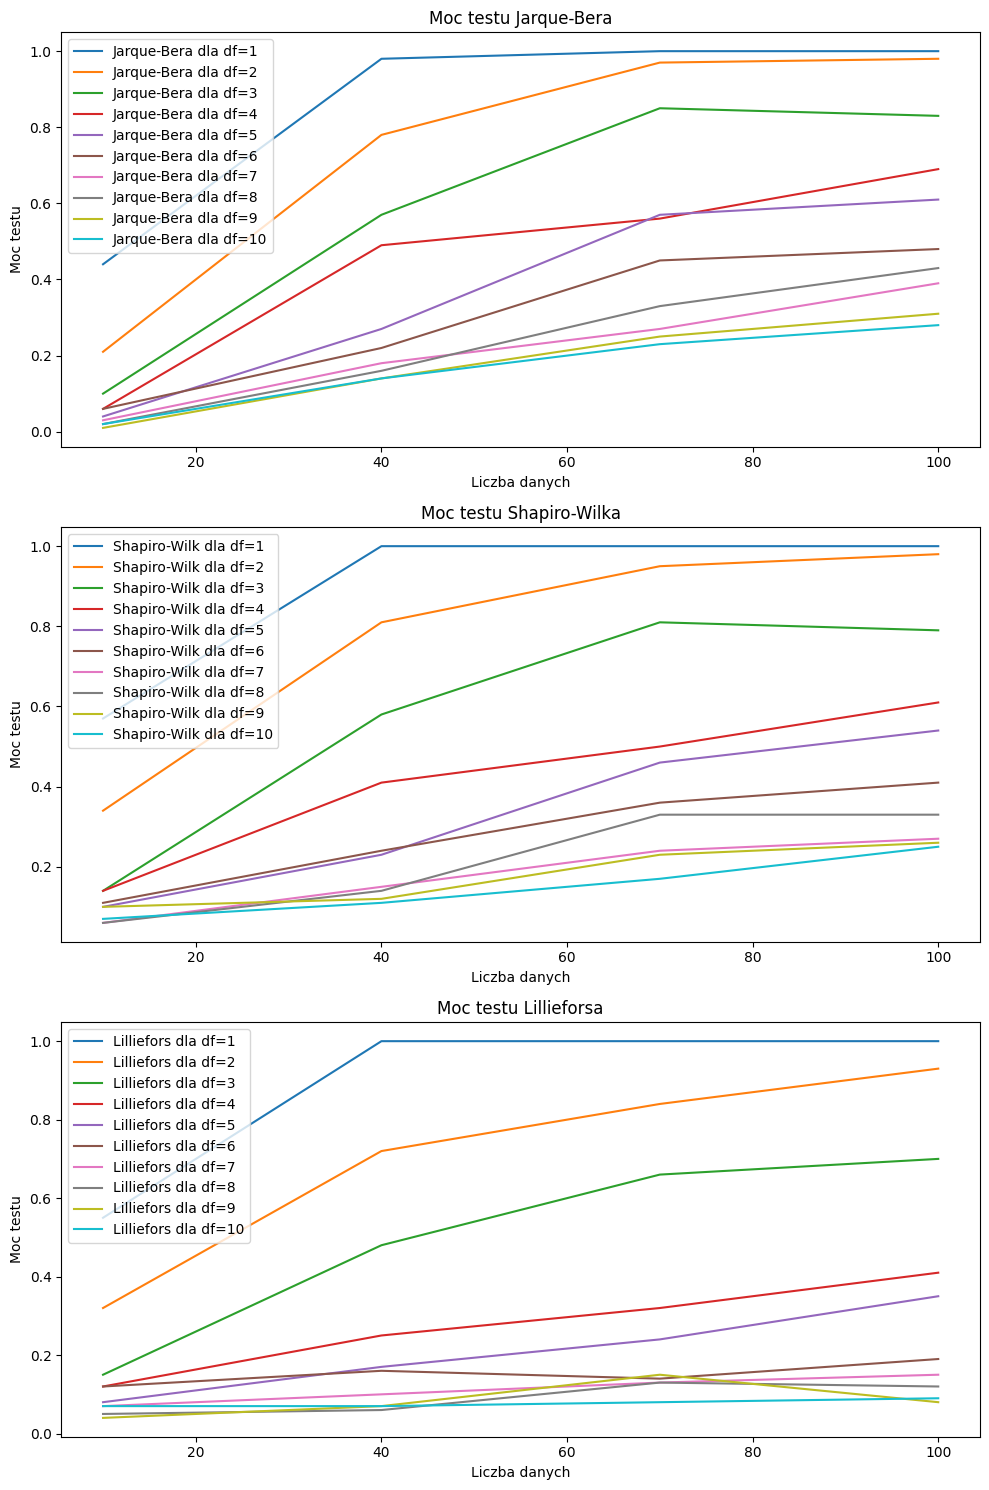

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Tworzenie DataFrame z wyników
df_results = pd.DataFrame(results, columns=['df', 'Sample', 'Jarque-Bera', 'Shapiro-Wilk', 'Lilliefors'])


fig, axs = plt.subplots(3, figsize=(10,15))

# Wykres dla testu Jarque-Bera
for df in df_results['df'].unique():
    df_subset = df_results[df_results['df'] == df]
    axs[0].plot(df_subset['Sample'], df_subset['Jarque-Bera'], label=f'Jarque-Bera dla df={df}')
axs[0].set_title('Moc testu Jarque-Bera')
axs[0].set_xlabel('Liczba danych')
axs[0].set_ylabel('Moc testu')
axs[0].legend()

# Wykres dla testu Shapiro-Wilka
for df in df_results['df'].unique():
    df_subset = df_results[df_results['df'] == df]
    axs[1].plot(df_subset['Sample'], df_subset['Shapiro-Wilk'], label=f'Shapiro-Wilk dla df={df}')
axs[1].set_title('Moc testu Shapiro-Wilka')
axs[1].set_xlabel('Liczba danych')
axs[1].set_ylabel('Moc testu')
axs[1].legend()

# Wykres dla testu Lillieforsa
for df in df_results['df'].unique():
    df_subset = df_results[df_results['df'] == df]
    axs[2].plot(df_subset['Sample'], df_subset['Lilliefors'], label=f'Lilliefors dla df={df}')
axs[2].set_title('Moc testu Lillieforsa')
axs[2].set_xlabel('Liczba danych')
axs[2].set_ylabel('Moc testu')
axs[2].legend()

# Wyświetlanie wykresów
plt.tight_layout()
plt.show()


Interpretacja i wnioski:

Test Jarque-Bera: Wykres przedstawia moc testu Jarque-Bera dla różnych stopni swobody (df) rozkładu t-Studenta. Moc testu rośnie wraz ze wzrostem liczby danych, co jest zgodne z oczekiwaniami - większa próbka daje więcej informacji, co zwiększa moc testu. Różne linie na wykresie odpowiadają różnym stopniom swobody rozkładu t-Studenta. Możemy zauważyć, że dla większych stopni swobody (df=10), moc testu jest generalnie wyższa, co sugeruje, że test Jarque-Bera jest bardziej skuteczny w wykrywaniu odstępstw od normalności dla rozkładów bardziej zbliżonych do normalnego (t-Studenta z większymi stopniami swobody).

Test Shapiro-Wilka: Podobnie jak w teście Jarque-Bera, moc testu Shapiro-Wilka rośnie wraz ze wzrostem liczby danych. Różne linie na wykresie odpowiadają różnym stopniom swobody rozkładu t-Studenta. Możemy zauważyć, że dla większych stopni swobody (df=10), moc testu jest generalnie wyższa, co sugeruje, że test Shapiro-Wilka jest bardziej skuteczny w wykrywaniu odstępstw od normalności dla rozkładów bardziej zbliżonych do normalnego.

Test Lillieforsa: Wykres dla testu Lillieforsa jest podobny do dwóch poprzednich. Moc testu rośnie wraz ze wzrostem liczby danych, a różne linie na wykresie odpowiadają różnym stopniom swobody rozkładu t-Studenta. Możemy zauważyć, że dla większych stopni swobody (df=10), moc testu jest generalnie wyższa, co sugeruje, że test Lillieforsa jest bardziej skuteczny w wykrywaniu odstępstw od normalności dla rozkładów bardziej zbliżonych do normalnego.

Podsumowując, wyniki te pokazują, jak moc testów statystycznych zależy od liczby danych i stopni swobody rozkładu t-Studenta. Wszystkie trzy testy wykazują większą moc dla większych próbek i dla rozkładów t-Studenta z większą liczbą stopni swobody, co jest zgodne z oczekiwaniami. Wyniki te są ważne dla zrozumienia ograniczeń tych testów i dla planowania przyszłych analiz statystycznych.